In [105]:
import numpy as np
import pandas as pd

In [106]:
data =pd.read_csv('satislar.csv',sep=';',low_memory=False, header=None)

In [107]:
data.head()

,0,1,2,3,4,5,6,7,8
0,1145,2236,2020-05-01 08:29:49.000,11450001261903,426410,0,1,05.07.014,"Tıraş Bıçak ve Jiletleri,,"
1,1129,2156,2020-05-01 08:30:44.000,11290001181201,59010,0,"1,5",03.03.002,"Dana Eti Kg,"
2,1141,2216,2020-05-01 08:36:56.000,11410001201443,314720,0,1,02.02.004,"Meyve Suları Küçük Boy,,"
3,1141,2216,2020-05-01 08:36:56.000,11410001201443,180122,1,1,01.07.002,"Çikolata,,"
4,1141,2216,2020-05-01 08:36:56.000,11410001201443,162169,2,1,01.04.002,"Bisküvi Çeşitleri,,"


In [108]:
data.info

<bound method DataFrame.info of             0     1                        2               3       4   5    6  \
0        1145  2236  2020-05-01 08:29:49.000  11450001261903  426410   0    1   
1        1129  2156  2020-05-01 08:30:44.000  11290001181201   59010   0  1,5   
2        1141  2216  2020-05-01 08:36:56.000  11410001201443  314720   0    1   
3        1141  2216  2020-05-01 08:36:56.000  11410001201443  180122   1    1   
4        1141  2216  2020-05-01 08:36:56.000  11410001201443  162169   2    1   
...       ...   ...                      ...             ...     ...  ..  ...   
1048571  1125  2137  2020-05-15 12:42:30.000  11250002395521  315002  15    1   
1048572  1125  2137  2020-05-15 12:42:30.000  11250002395521  318207  16    1   
1048573  1125  2137  2020-05-15 12:42:30.000  11250002395521  315002  17    1   
1048574  1125  2137  2020-05-15 12:42:30.000  11250002395521  315002  18    1   
1048575  1125  2137  2020-05-15 12:42:30.000  11250002395521  317570  19    1

In [109]:
data.shape

(1048576, 9)

In [110]:
data.dtypes

0     int64
1     int64
2    object
3     int64
4     int64
5     int64
6    object
7    object
8    object
dtype: object

In [111]:
data.drop([0,1,4,5],axis=1,inplace=True)

In [112]:
data.isnull().sum()

2        0
3        0
6        0
7    73833
8        0
dtype: int64

<AxesSubplot:>

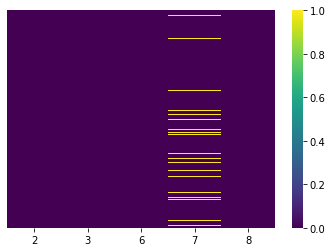

In [113]:
import seaborn as sns 
sns.heatmap(data.isnull(),yticklabels=False,cmap="viridis")

In [114]:
data.dropna(inplace=True)

In [115]:
data.shape

(974743, 5)

In [116]:
ing_sutun_isimleri = ['Tarih','Fatura_No','Miktar','kategori Kodu','Alısveris']
data.columns = ing_sutun_isimleri
data.head(5)

,Tarih,Fatura_No,Miktar,kategori Kodu,Alısveris
0,2020-05-01 08:29:49.000,11450001261903,1,05.07.014,"Tıraş Bıçak ve Jiletleri,,"
1,2020-05-01 08:30:44.000,11290001181201,"1,5",03.03.002,"Dana Eti Kg,"
2,2020-05-01 08:36:56.000,11410001201443,1,02.02.004,"Meyve Suları Küçük Boy,,"
3,2020-05-01 08:36:56.000,11410001201443,1,01.07.002,"Çikolata,,"
4,2020-05-01 08:36:56.000,11410001201443,1,01.04.002,"Bisküvi Çeşitleri,,"


In [117]:
data['Alısveris'] = data['Alısveris'].apply(lambda x: x.strip(",")) 

In [118]:
data.head(5)

,Tarih,Fatura_No,Miktar,kategori Kodu,Alısveris
0,2020-05-01 08:29:49.000,11450001261903,1,05.07.014,Tıraş Bıçak ve Jiletleri
1,2020-05-01 08:30:44.000,11290001181201,"1,5",03.03.002,Dana Eti Kg
2,2020-05-01 08:36:56.000,11410001201443,1,02.02.004,Meyve Suları Küçük Boy
3,2020-05-01 08:36:56.000,11410001201443,1,01.07.002,Çikolata
4,2020-05-01 08:36:56.000,11410001201443,1,01.04.002,Bisküvi Çeşitleri


In [121]:
data["Alısveris"].value_counts()

Sebze                    183480
Çikolata                  51261
Sigara                    48101
Meyve                     36172
Bisküvi Çeşitleri         34495
                          ...  
Porselen Urunler              9
Silgi ve Kalemtraslar         9
Oyuncak Cesitleri             4
Fırca ve Taraklar             3
Ahsap Urunler                 3
Name: Alısveris, Length: 257, dtype: int64

In [120]:
data["Fatura_No"].nunique() #Kesilen fatura sayısı

256495

In [123]:
data.groupby(["Fatura_No", 'Alısveris'])['Alısveris'].count() # Hangi faturada neler alınmış

Fatura_No       Alısveris        
11010001071064  Peçete               2
                Sebze                2
                Sigara               1
                Soda-Maden Suyu      1
11010001071065  Bisküvi Çeşitleri    4
                                    ..
40100000010294  Dondurma             6
                Enerji İçeceği       1
                Kola                 1
                Soda-Maden Suyu      3
                Çikolata             1
Name: Alısveris, Length: 656238, dtype: int64

In [125]:
branch_order = (data.groupby(['Fatura_No', 'Alısveris'])['Miktar'] .sum().unstack().reset_index().fillna(0) .set_index('Fatura_No'))

In [126]:
branch_order.head(10)

Alısveris,Agız Bakım Suyu,Ahsap Temizleyici,Ahsap Urunler,Aluminyum Folyo,Ampul Cesitleri,Arap Sabunu,Ayakkabı Boya Malzemeleri,Ayran,Ayçiçek Yağı,Ağda Malzemeleri,...,Çay Bardak,Çay Bitki,Çay Demlik,Çay Kg,Çikolata,Çocuk Bezi,Çorba,İrmik,Şalgam Suyu,Şampuan
Fatura_No,,,,,,,,,,,,,,,,,,,,,
11010001071064,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11010001071065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11010001071066,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11010001071067,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11010001071068,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11010001071069,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11010001071070,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11010001071071,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11010001071072,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,32,0,0,0,0,0


In [127]:
encoded = branch_order.applymap(lambda x: 1 if x != 0 else 0) #0 1 formatına donusturulmus hali

In [132]:
!pip install mlxtend

You should consider upgrading via the 'C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [170]:
from mlxtend.frequent_patterns import apriori
x = apriori(encoded, min_support=0.01, use_colnames=True, verbose=1)

Processing 372 combinations | Sampling itemset size 32


In [171]:
freq_items.sort_values('support', ascending=False)

,support,itemsets
31,0.304661,(Sebze)
34,0.149504,(Sigara)
8,0.108564,(Ekmek)
21,0.093963,(Meyve)
47,0.091249,(Çikolata)
...,...,...
0,0.010608,(Ayran)
20,0.010351,(Maya)
25,0.010273,(Mutfak ve Banyo Temizleyici )
57,0.010238,"(Ekmek, Kola)"


In [174]:
from mlxtend.frequent_patterns import association_rules
association_rules(x, metric = 'confidence', min_threshold=0.1).sort_values(['support','confidence'], ascending=[False,False])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
25,(Meyve),(Sebze),0.093963,0.304661,0.047744,0.508112,1.667794,0.019117,1.413612
26,(Sebze),(Meyve),0.304661,0.093963,0.047744,0.156711,1.667794,0.019117,1.074408
13,(Dana Eti Kg),(Sebze),0.090719,0.304661,0.038285,0.422021,1.385215,0.010647,1.203052
12,(Sebze),(Dana Eti Kg),0.304661,0.090719,0.038285,0.125665,1.385215,0.010647,1.039969
15,(Ekmek),(Sebze),0.108564,0.304661,0.030094,0.277203,0.909874,-0.002981,0.962012
33,(Sigara),(Sebze),0.149504,0.304661,0.027041,0.180875,0.593692,-0.018507,0.848880
31,(Piliç Eti Kg),(Sebze),0.076516,0.304661,0.025560,0.334047,1.096454,0.002248,1.044126
37,(Çikolata),(Sebze),0.091249,0.304661,0.023993,0.262935,0.863042,-0.003807,0.943389
19,(Kola),(Sebze),0.087943,0.304661,0.023279,0.264707,0.868858,-0.003514,0.945663
6,(Bisküvi Çeşitleri),(Çikolata),0.067303,0.091249,0.021533,0.319933,3.506138,0.015391,1.336266


In [ ]:
#Suuport= Ürünlerin Birlikte Geçme Olasılığı
#Confidence= X’i Alanların Y’yi Alma Olasılığı
#Lift= X ürünü alanların Y ürünü satın alması şu kadar kat artıyor yorumudur